Trần Quang Nghĩa - 19110392

Lab 1 - MHNC

In [12]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [13]:
#Kiểm tra version của keras
keras.__version__

'2.9.0'

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


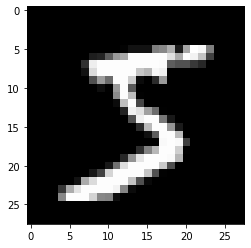

In [14]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào (dùng ảnh trắng đen)
## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

In [15]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))



## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(inputs)
print("Kích thước flatten: {}".format(flatten.shape))

dense1= keras.layers.Dense(units=200,activation="relu")(flatten)
print("Kích thước fc1: {}".format(dense1.shape))

dense2= keras.layers.Dense(units=100,activation="relu")(dense1)
print("Kích thước fc1: {}".format(dense2.shape))

dense3= keras.layers.Dense(units=50,activation="relu")(dense2)
print("Kích thước fc1: {}".format(dense3.shape))

dense4= keras.layers.Dense(units=20,activation="relu")(dense3)
print("Kích thước fc1: {}".format(dense4.shape))

## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(dense4)


## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước flatten: (None, 784)
Kích thước fc1: (None, 200)
Kích thước fc1: (None, 100)
Kích thước fc1: (None, 50)
Kích thước fc1: (None, 20)
Cấu trúc của model: 
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 200)               157000    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)  

In [16]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 3s 4ms/step - loss: 0.3412 - accuracy: 0.8968 - val_loss: 0.1563 - val_accuracy: 0.9513
Epoch 2/10
540/540 [==============================] - 2s 3ms/step - loss: 0.1248 - accuracy: 0.9620 - val_loss: 0.1294 - val_accuracy: 0.9627
Epoch 3/10
540/540 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9740 - val_loss: 0.0970 - val_accuracy: 0.9710
Epoch 4/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 0.0917 - val_accuracy: 0.9752
Epoch 5/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0814 - val_accuracy: 0.9762
Epoch 6/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 7/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 

Cách tính params ở trên
- param_number = output * (input + 1)
$$ 157000 = 200 * (784 + 1)$$

$$20100 = 100 * (200 + 1)$$

$$5050 = 50 * (100 + 1)$$

$$1020 = 20 * (50 + 1)$$

$$210 = 10 * (20 + 1)$$ 

Cấu trúc câu 1 có thể áp dụng cho bài toán Regression bằng cách đổi lớp đầu tiên thành `normalizer` và không cần sofmax.

In [17]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))

## Tạo Convolutional Layer
### fileters: số lượng filter
### kernel_size: kích thước của filter
### strides: bước dịch của filter khi tính convolution
### padding: thêm số 0 hoặc không tính khi tính filter ở biên
    #### có 2 options: "same" là sẽ giữ nguyên kích thước ảnh sau khi qua lớp Convolution, "valid" kích thước ảnh sẽ đc tính đúng như công thức
### activation: hàm kích hoạt của lớp convolution
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

## Maxpooling
### pool_size: kích thước pool để lấy max
### strides: bước dịch của pool 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)
print("Kích thước sau maxpool: {}".format(maxpool.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(maxpool)
print("Kích thước flatten: {}".format(flatten.shape))

## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(flatten)


## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước conv: (None, 28, 28, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (None, 14, 14, 20)
Kích thước flatten: (None, 3920)
Cấu trúc của model: 
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_8 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
             

In [18]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)


## Tạo Convolutional Layer
### fileters: số lượng filter
### kernel_size: kích thước của filter
### strides: bước dịch của filter khi tính convolution
### padding: thêm số 0 hoặc không tính khi tính filter ở biên
#### có 2 options: "same" là sẽ giữ nguyên kích thước ảnh sau khi qua lớp Convolution, "valid" kích thước ảnh sẽ đc tính đúng như công thức
### activation: hàm kích hoạt của lớp convolution
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)

## Maxpooling
### pool_size: kích thước pool để lấy max
### strides: bước dịch của pool 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)

conv1 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='valid',
                                 activation=tf.nn.relu)(maxpool)
maxpool1 = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv1)

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector                           
flatten = keras.layers.Flatten()(maxpool1)

## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
dense1= keras.layers.Dense(units=20,activation="relu")(flatten)
dense2= keras.layers.Dense(units=10,activation="relu")(dense1)
softmax = keras.layers.Dense(units=10, activation='softmax')(dense2)

## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Cấu trúc của model: 
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 reshape_9 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 20)        10020     
                                                                 
 max_